# **1. Import Library**

Library ini digunakan untuk pengolahan data, visualisasi, pembuatan model, dan evaluasi performa.

In [2]:
# Library untuk manipulasi data
import pandas as pd
import numpy as np

# Library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Untuk menyimpan model
import joblib


# **2. Load Dataset**

Dataset diambil dari Kaggle dalam format CSV dan dimuat ke dalam DataFrame.

In [3]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Big Data Mining Semester 5/UAS/Heart_Disease_Prediction.csv')

# Menampilkan 5 data teratas
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


# **3. Informasi Dataset**

Digunakan untuk melihat struktur data, tipe data, dan mengecek apakah ada nilai kosong.

In [4]:
# Informasi dataset
df.info()

# Mengecek missing value
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


# **4. Exploratory Data Analysis (EDA)**

**4.1 Distribusi Target**

Mengetahui perbandingan jumlah pasien yang memiliki dan tidak memiliki penyakit jantung.

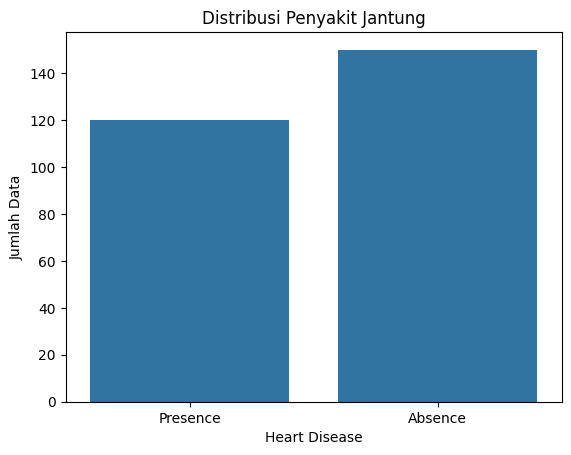

In [5]:
sns.countplot(x='Heart Disease', data=df)
plt.title('Distribusi Penyakit Jantung')
plt.xlabel('Heart Disease')
plt.ylabel('Jumlah Data')
plt.show()

**4.2 Korelasi Antar Fitur**

Melihat hubungan antar variabel untuk mengetahui fitur yang berpengaruh.

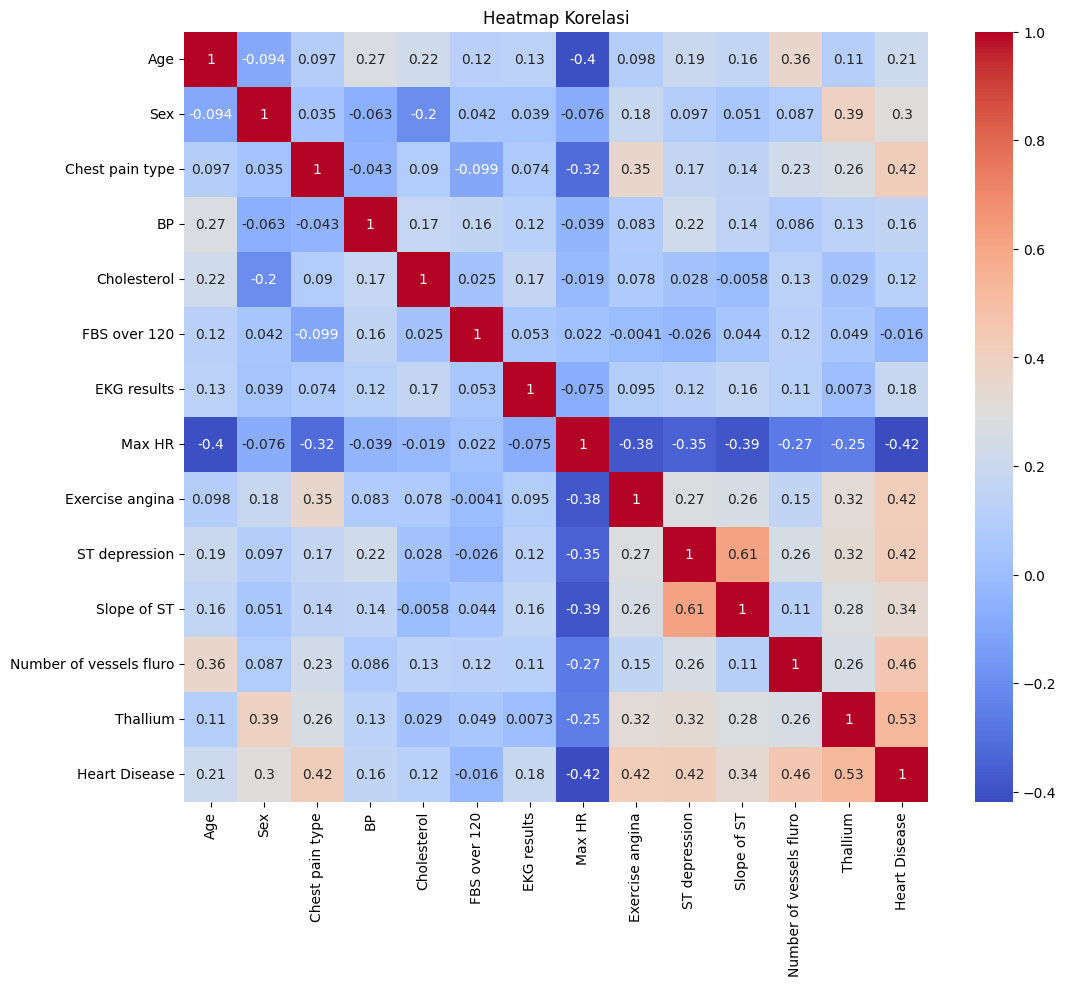

In [6]:
df_encoded = df.copy()
df_encoded['Heart Disease'] = df_encoded['Heart Disease'].map({'Absence': 0, 'Presence': 1})

plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

# **5. Pemisahan Fitur dan Target**

Fitur (X) adalah data input, sedangkan target (y) adalah label penyakit jantung.

In [7]:
X = df_encoded.drop('Heart Disease', axis=1)
y = df_encoded['Heart Disease']

In [8]:
print("Fitur (X):")
display(X.head())

print("\nTarget (y):")
display(y.head())

Fitur (X):


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3



Target (y):


,Heart Disease
0,1
1,0
2,1
3,0
4,0


# **6. Feature Scaling**

Scaling diperlukan agar semua fitur berada pada skala yang sama, terutama untuk Logistic Regression.

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
print("Sebelum Scaling:")
display(X.head())

print("\nSesudah Scaling:")
display(pd.DataFrame(X_scaled, columns=X.columns).head())


Sebelum Scaling:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3



Sesudah Scaling:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706


# **7. Train-Test Split**

Data dibagi menjadi data latih dan data uji untuk mengukur performa model.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)

# 8. Modeling – Logistic Regression

Logistic Regression digunakan sebagai baseline model klasifikasi.

In [12]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy Logistic Regression: 0.9074074074074074
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



# **9. Modeling – Random Forest**

Random Forest mampu menangkap hubungan non-linear dan kompleks antar fitur.

In [13]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy Random Forest: 0.7962962962962963
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.78      0.67      0.72        21

    accuracy                           0.80        54
   macro avg       0.79      0.77      0.78        54
weighted avg       0.79      0.80      0.79        54



# **10. Confusion Matrix**

Menunjukkan jumlah prediksi benar dan salah.

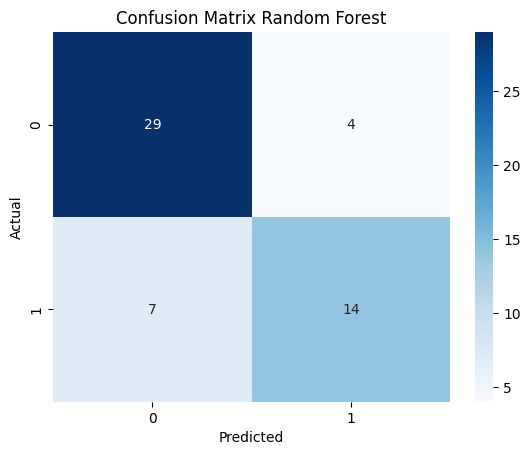

In [14]:
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Soal Nomor 5**

In [15]:
# Melatih Random Forest untuk feature importance
rf_temp = RandomForestClassifier(random_state=42)
rf_temp.fit(X_train, y_train)

# Menampilkan feature importance
feature_importance = pd.Series(
    rf_temp.feature_importances_, index=X.columns
).sort_values(ascending=False)

feature_importance


,0
ST depression,0.138002
Chest pain type,0.133470
Thallium,0.114730
Max HR,0.105259
Age,0.095171
Number of vessels fluro,0.085092
Cholesterol,0.083485
BP,0.079547
Slope of ST,0.059689
Exercise angina,0.052720


In [16]:
from sklearn.linear_model import LogisticRegression

# Membuat model Logistic Regression
model_lr = LogisticRegression(max_iter=1000)

# Melatih model menggunakan data training
model_lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)